In [ ]:
# If running on Colab you will be asked to restart the session. This is normal and you should do so.
# Only run this cell if running on Colab.
# Change to the notebooks directory
%cd dsi-toolathon-2025-granite-geospatial-land-surface-temperature/notebooks/
%pwd

In [1]:
import folium
import numpy as np  
import rasterio
import branca
import branca.colormap as cm
import folium.plugins

In [2]:
with rasterio.open("../data/predictions-dsi/reprojected/accra_gha.T30NZM.20200203.T000000.inputs_pred.tif") as src:
        image_data2 = src.read(1)  # Read the first band of the raster
        bounds = [[src.bounds.bottom, src.bounds.left], [src.bounds.top, src.bounds.right]]
        center_lat = (src.bounds.top + src.bounds.bottom) / 2
        center_lon = (src.bounds.left + src.bounds.right) / 2

In [3]:
m = folium.Map(location=[center_lat, center_lon], zoom_start=9, tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True)

In [4]:
red_shades = ['#ffefea', '#fbd9d3', '#ffb09c', '#ee2400', '#900000']
colormap = cm.LinearColormap(colors=red_shades, vmin=0, vmax=40)

In [5]:

folium.raster_layers.ImageOverlay(
        image=(image_data2),
        #color=colormap, 
        bounds=bounds,
        opacity=0.7,   
        interactive=True,
        colormap= colormap,#lambda x: (1, 0, 0, x),
        #cross_origin=False
    ).add_to(m)

folium.LayerControl().add_to(m)


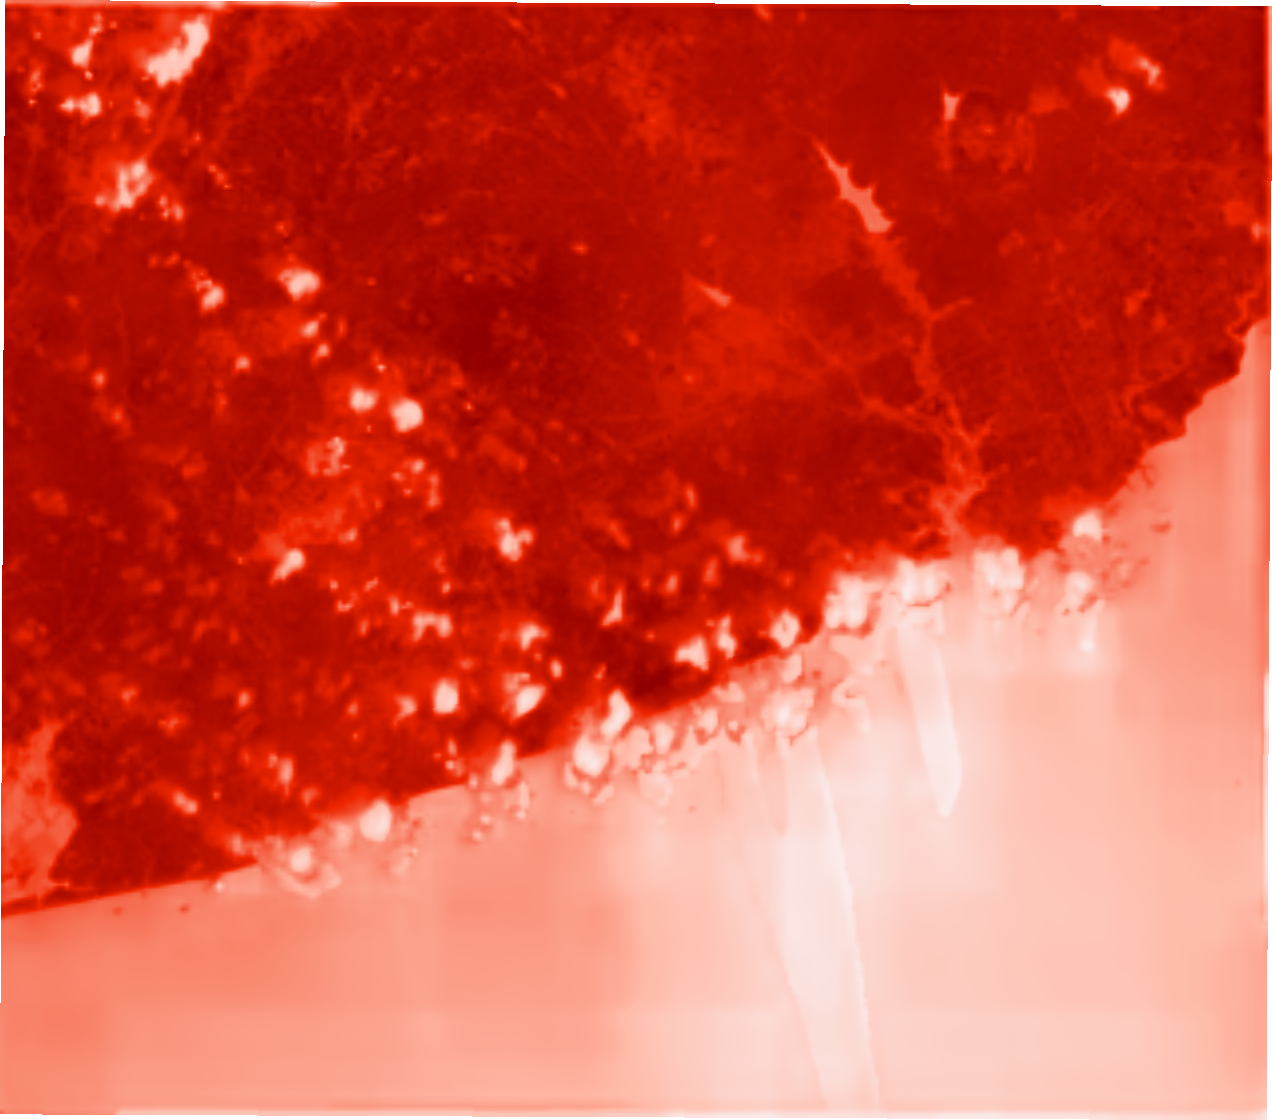

In [6]:
m